In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, average_precision_score
from sklearn.inspection import permutation_importance


In [9]:
# Load data
# This assumes data is in a DataFrame called df with 'NDVI', 'NBR' as columns and 'label' as target column

data = pd.read_csv('sample_data.csv')


In [10]:
# Split data into training and test set
data['NBR_NDVI'] = data['NBR_NDVI'].apply(lambda x: eval(x))

X = np.array([np.ravel(sublist) for sublist in data['NBR_NDVI']])

# Labels
y = data['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [16]:
# Classifier used: Radial Basis Function (RBF)
# it can combine multiple polynomial kernels multiple times of different degrees to
# project the non-linearly separable data into higher dimensional space

# gamma: https://www.ibm.com/docs/sr/spss-modeler/18.0.0?topic=node-svm-expert-options
# C: https://vitalflux.com/svm-rbf-kernel-parameters-code-sample/
rbf = svm.SVC(kernel='rbf', gamma=1, C=2).fit(X_train, y_train)


In [17]:
# Calculate model efficiency

rbf_pred = rbf.predict(X_test)


In [18]:
# Calculate the accuracy and f1 scores for SVM with RBF kernel

rbf_accuracy = accuracy_score(y_test, rbf_pred)
rbf_precision = precision_score(y_test, rbf_pred, average='macro')
rbf_recall = recall_score(y_test, rbf_pred, average='macro')
rbf_average_precision = average_precision_score(y_test, rbf_pred, average='macro')

print(f"Accuracy: {rbf_accuracy:.4f}")
print(f"Precision: {rbf_precision:.4f}")
print(f"Recall: {rbf_recall:.4f}")
print(f"Mean Average Precision: {rbf_average_precision:.4f}")

print(classification_report(y_test, rbf_pred))
print(confusion_matrix(y_test, rbf_pred))


Accuracy: 0.0000
Precision: 0.0000
Recall: 0.0000
Mean Average Precision: 0.3333
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       2.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0

[[0 2]
 [1 0]]


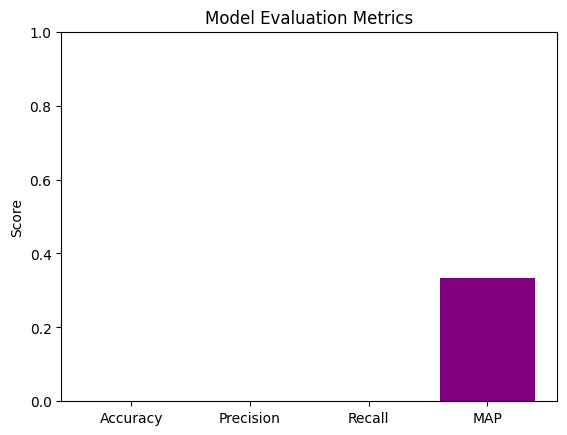

In [13]:
# Visualize the model evaluation metrics

metrics = ['Accuracy', 'Precision', 'Recall', 'MAP']
values = [rbf_accuracy, rbf_precision, rbf_recall, rbf_average_precision]

plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple'])
plt.ylabel('Score')
plt.title('Model Evaluation Metrics')
plt.ylim(0, 1)  # to set y-axis limits from 0 to 1
plt.show()


TypeError: only length-1 arrays can be converted to Python scalars

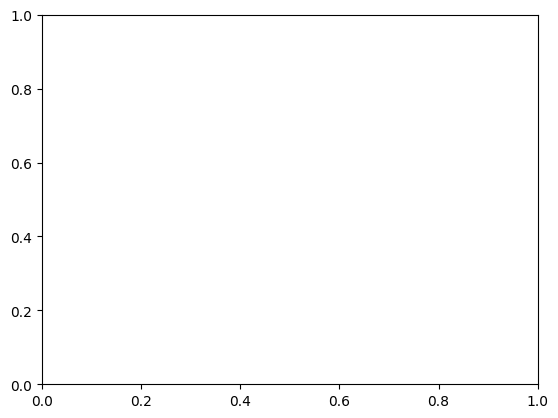

In [15]:
perm_importance = permutation_importance(rbf, X_test, y_test)
features = np.array(X)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
